In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw = pd.read_csv('Proj1ReorderedRound.csv')
                  
raw

Condition  Cylinder heating zone 1  Cylinder heating zone 2  \
0       Normal1                   271.52                   300.76   
1       Normal1                   271.19                   301.67   
2       Normal1                   283.09                   286.21   
3       Normal1                   269.67                   285.23   
4       Normal1                   290.22                   302.07   
..          ...                      ...                      ...   
126  Condition3                   287.71                   303.94   
127  Condition3                   277.99                   297.07   
128  Condition3                   268.84                   300.23   
129  Condition3                   288.93                   309.84   
130  Condition3                   286.02                   287.57   

     Cylinder heating zone 3  Cylinder heating zone 4  \
0                     313.86                   316.14   
1                     299.54                   320.24   
2                     309.44                   307.25   
3                     306.52                   298.81   
4                     310.10                   312.94   
..                       ...                      ...   
126                   308.70                   315.92   
127                   322.40                   313.95   
128                   295.28                   311.97   
129                   313.65                   304.01   
130                   301.75                   310.98   

     Cylinder heating zone 5  Mould temperature control unit 1  \
0                     317.33                             92.63   
1                     302.82                             91.95   
2                     306.27                             87.64   
3                     318.56                             94.44   
4                     324.73                             94.31   
..                       ...                               ...   
126                   325.23                             91.61   
127                   313.96                             88.95   
128                   322.40                             91.04   
129                   320.37                             89.96   
130                   322.77                             85.80   

     Maximum injection pressure  Cycle time  Injection time  Dosage time  \
0                       1506.14      29.860           0.234        2.986   
1                       1452.35      30.138           0.234        3.008   
2                       1474.93      28.566           0.234        3.098   
3                       1546.73      27.786           0.224        3.048   
4                       1598.14      29.836           0.244        2.998   
..                          ...         ...             ...          ...   
126                     1609.08      29.406           0.228        2.824   
127                     1535.26      29.768           0.238        2.896   
128                     1526.63      29.418           0.228        2.916   
129                     1475.82      29.208           0.238        3.016   
130                     1559.94      30.268           0.228        2.746   

     Switch-over volume  Material cushion  
0               1.48334          0.958447  
1               1.36334          0.959772  
2               1.38334          0.919388  
3               1.51334          0.936952  
4               1.52334          0.914964  
..                  ...               ...  
126             1.68397          1.034150  
127             1.60397          0.991890  
128             1.87397          1.071890  
129             1.63397          0.995290  
130             1.86397          0.993960  

[131 rows x 13 columns]

In [2]:
# create a function for the 1st form of statistical analysis: count, mean ,std , min, max using describe function
# range and mode are added after data processing
def process(filter):
    print("\n"+filter+" :")
    df_temp = raw[raw['Condition'] ==  filter]
    df_results = df_temp.describe().round(3)
    
    #display(df_results)

    df_results = df_results.rename(index = {"50%": "median"})
    df_results.loc['range'] = (df_results.loc['max'] - df_results.loc['min'])

    df_mode = df_temp.round({'Cylinder heating zone 1': 0,'Cylinder heating zone 2': 0,'Cylinder heating zone 3': 0,'Cylinder heating zone 4': 0,'Cylinder heating zone 5': 0,'Mould temperature control unit 1': 0,'Maximum injection pressure': -1,'Cycle time': 1,'Injection time': 3,'Dosage time': 1,'Switch-over volume': 2,'Material cushion': 2})
    df_mode = df_mode.mode()
    df_mode = df_mode.drop('Condition', axis=1)
    df_mode = df_mode.dropna(thresh=1).transpose()
    df_mode['mode'] = df_mode[df_mode.columns[0:]].apply(lambda x: ', '.join(x.dropna().astype(str)),axis=1)
    df_mode = df_mode[['mode']].transpose()

    
    #Uncomment to append mode results 
    df_final = pd.concat([df_results,df_mode])
    
    #Comment to append mode results
    #df_final = df_results
    

    display(df_final)


process(filter = "Normal1")
process(filter = "Condition3")
process(filter = "Condition4")



Normal1 :


Cylinder heating zone 1 Cylinder heating zone 2  \
count                     50.0                    50.0   
mean                   279.331                 296.807   
std                      8.457                    7.97   
min                     266.33                   280.3   
25%                    271.272                 290.315   
median                   278.8                  298.93   
75%                    287.403                   303.0   
max                     293.44                  309.51   
range                    27.11                   29.21   
mode              270.0, 278.0                   302.0   

       Cylinder heating zone 3 Cylinder heating zone 4  \
count                     50.0                    50.0   
mean                   308.208                 310.253   
std                      8.475                   9.763   
min                     295.05                  296.27   
25%                     300.43                 300.222   
median                  308.95                  308.91   
75%                    313.825                 320.212   
max                     325.04                  325.36   
range                    29.99                   29.09   
mode              299.0, 309.0                   299.0   

       Cylinder heating zone 5 Mould temperature control unit 1  \
count                     50.0                             50.0   
mean                   316.402                            89.95   
std                      8.836                            2.772   
min                     302.24                            85.76   
25%                    309.372                           87.725   
median                 317.045                           88.995   
75%                    322.928                            92.63   
max                      330.7                            94.44   
range                    28.46                             8.68   
mode                     320.0                             88.0   

       Maximum injection pressure Cycle time Injection time Dosage time  \
count                        50.0       50.0           50.0        50.0   
mean                      1543.42     28.787          0.234       2.929   
std                        50.515       0.88          0.008       0.088   
min                       1440.62     27.434          0.224       2.776   
25%                      1507.372      27.98          0.224       2.855   
median                    1542.42     28.731          0.234       2.928   
75%                      1581.758     29.512          0.244        3.01   
max                       1630.61     30.202          0.244       3.098   
range                      189.99      2.768           0.02       0.322   
mode                       1540.0       29.5          0.224         2.9   

       Switch-over volume Material cushion  
count                50.0             50.0  
mean                1.511            0.952  
std                 0.092            0.029  
min                 1.343            0.892  
25%                 1.448            0.935  
median              1.513            0.953  
75%                 1.571             0.97  
max                 1.733            1.011  
range                0.39            0.119  
mode                 1.46             0.97


Condition3 :


Cylinder heating zone 1 Cylinder heating zone 2  \
count                                40.0                    40.0   
mean                              279.159                  296.16   
std                                   7.6                   8.653   
min                                266.28                  280.64   
25%                               274.485                 289.062   
median                            278.565                  295.24   
75%                               284.738                 305.225   
max                                293.12                  309.84   
range                               26.84                    29.2   
mode    269.0, 276.0, 277.0, 278.0, 288.0     289.0, 292.0, 307.0   

       Cylinder heating zone 3 Cylinder heating zone 4  \
count                     40.0                    40.0   
mean                   310.508                 309.872   
std                      8.744                   8.034   
min                      294.9                   295.5   
25%                     302.94                 303.958   
median                 311.995                  310.38   
75%                    315.645                 315.925   
max                     325.34                  322.46   
range                    30.44                   26.96   
mode                     314.0                   316.0   

       Cylinder heating zone 5 Mould temperature control unit 1  \
count                     40.0                             40.0   
mean                    313.96                           90.301   
std                      8.652                            2.797   
min                     299.81                            85.51   
25%                    306.385                           88.023   
median                 314.065                           91.155   
75%                    321.128                           92.305   
max                     330.25                             94.6   
range                    30.44                             9.09   
mode                     321.0                             92.0   

       Maximum injection pressure Cycle time Injection time Dosage time  \
count                        40.0       40.0           40.0        40.0   
mean                     1543.389      29.07          0.225       2.873   
std                        45.321      0.784          0.007       0.091   
min                       1467.85      27.59          0.218       2.704   
25%                      1512.915      28.48          0.218       2.806   
median                    1537.42     29.173          0.228       2.878   
75%                      1584.862     29.792          0.228       2.932   
max                       1657.68     30.268          0.238       3.042   
range                      189.83      2.678           0.02       0.338   
mode                       1540.0       28.9          0.218         2.9   

       Switch-over volume Material cushion  
count                40.0             40.0  
mean                1.695            1.042  
std                 0.116            0.038  
min                 1.434            0.978  
25%                 1.629            1.015  
median              1.699            1.038  
75%                  1.78            1.068  
max                 1.924            1.134  
range                0.49            0.156  
mode                 1.72             1.07


Condition4 :


Cylinder heating zone 1 Cylinder heating zone 2  \
count                         41.0                    41.0   
mean                       280.567                  296.53   
std                          7.046                   8.484   
min                         267.32                  280.67   
25%                         276.88                  290.68   
median                      282.51                  298.47   
75%                         286.39                  302.97   
max                         292.63                  309.71   
range                        25.31                   29.04   
mode    277.0, 284.0, 286.0, 287.0     286.0, 291.0, 299.0   

       Cylinder heating zone 3 Cylinder heating zone 4  \
count                     41.0                    41.0   
mean                   311.372                 310.736   
std                      8.944                   8.816   
min                     294.97                  295.76   
25%                     304.63                  305.33   
median                  313.59                  311.98   
75%                      318.8                  317.44   
max                     324.66                  325.39   
range                    29.69                   29.63   
mode                     314.0            296.0, 307.0   

       Cylinder heating zone 5 Mould temperature control unit 1  \
count                     41.0                             41.0   
mean                   317.017                           90.013   
std                      7.708                            2.724   
min                     303.01                            85.55   
25%                     311.21                            87.89   
median                  317.13                            90.09   
75%                     322.97                            92.58   
max                     330.61                            94.35   
range                     27.6                              8.8   
mode                     311.0                             93.0   

       Maximum injection pressure Cycle time Injection time Dosage time  \
count                        41.0       41.0           41.0        41.0   
mean                     1605.722     28.906           0.24       2.883   
std                        49.447       0.85          0.009       0.091   
min                       1531.45     27.582           0.23       2.724   
25%                        1563.3     28.186           0.23       2.796   
median                    1604.84     28.942           0.24       2.904   
75%                       1646.37     29.699           0.25       2.958   
max                       1687.83      30.21           0.25        3.05   
range                      156.38      2.628           0.02       0.326   
mode                       1540.0       29.7     0.23, 0.25         2.9   

       Switch-over volume Material cushion  
count                41.0             41.0  
mean                1.365            0.854  
std                 0.094            0.028  
min                  1.15             0.81  
25%                  1.31             0.83  
median               1.37             0.86  
75%                  1.42            0.883  
max                  1.54            0.893  
range                0.39            0.083  
mode                 1.42             0.89

<AxesSubplot:xlabel='Material cushion', ylabel='Density'>

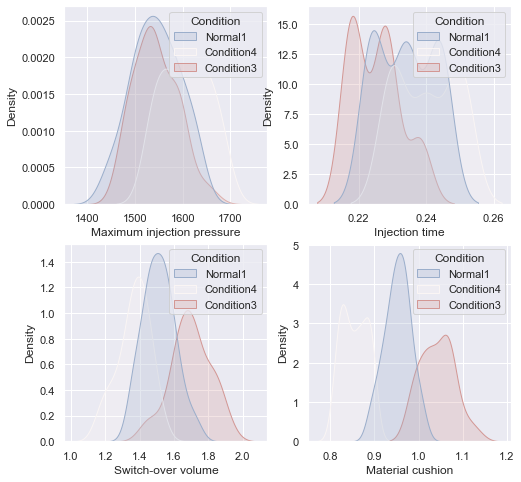

In [3]:
 #we also utilised the kde plots to depicts the probability density function of the continuous or non-parametric data variables
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,8)})
fig, axes = plt.subplots(2, 2) 


sns.kdeplot(raw['Maximum injection pressure'], palette = "vlag", shade=True, hue=raw['Condition'], ax=axes[0,0])
sns.kdeplot(raw['Injection time'], palette = "vlag", shade=True, hue=raw['Condition'], ax=axes[0,1])
sns.kdeplot(raw['Switch-over volume'], palette = "vlag", shade=True, hue=raw['Condition'], ax=axes[1,0])
sns.kdeplot(raw['Material cushion'], palette = "vlag", shade=True, hue=raw['Condition'], ax=axes[1,1])


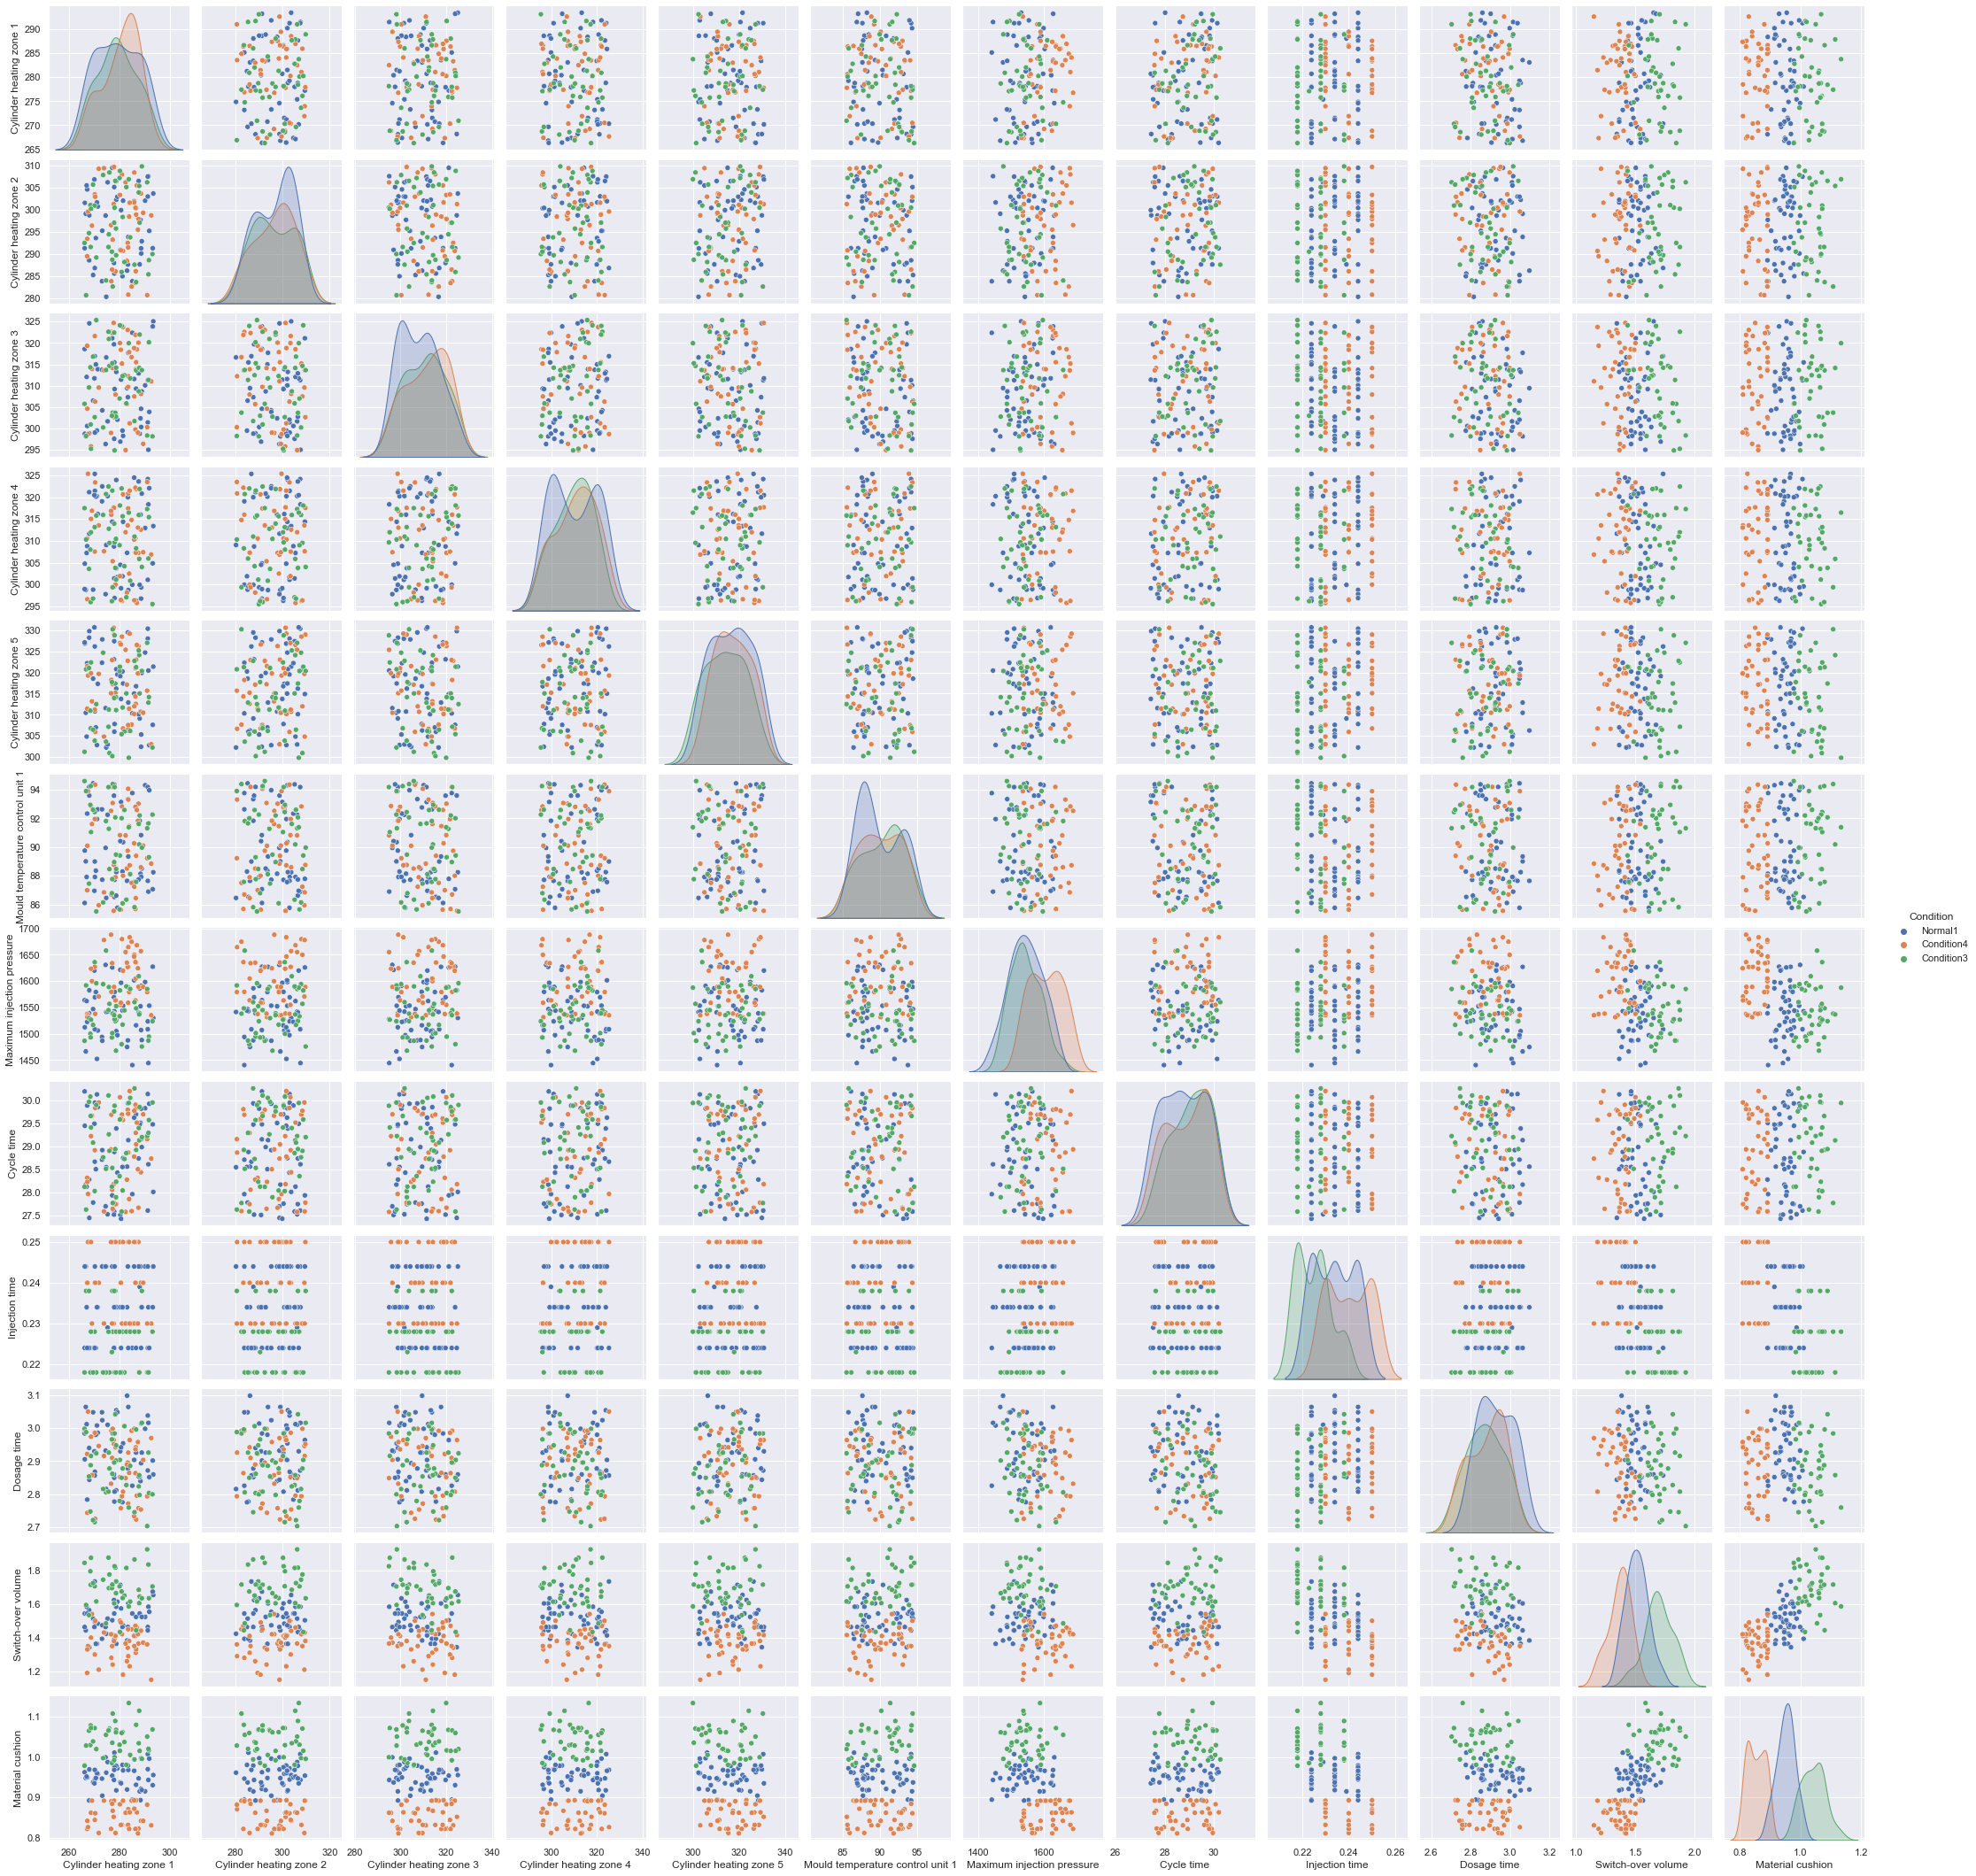

In [4]:
import seaborn as sns #plot pairplot to see correlation between parameters
sns.pairplot(raw, hue='Condition')

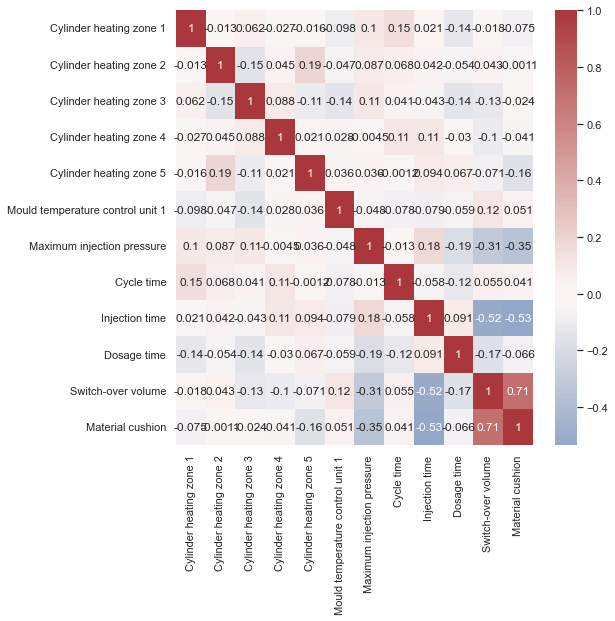

In [5]:
#plot correlation matrix between parameters
corrMatrix = raw.corr(method='pearson') 
sns.heatmap(corrMatrix, annot=True, cmap="vlag", center=0)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [6]:
# TO DO: Find the relationship between the parameters (within each conditions) and how they are affected by 
#        the conditions (more important). Also use tableau to find more insights

In [7]:
# Possible useful insights : Deviating the switchover position from the master setup seems to increase the cycle time slightly.
# The master setup appears to have the optimal switchover position that minimizes the time taken to mould a single product.

In [8]:
#inner condition returns T/F for each row, then saves T rows in new df for each condition
Nfilled = raw[raw['Condition'] ==  "Normal1"] 

C3filled = raw[raw['Condition'] ==  "Condition3"] 

C4filled = raw[raw['Condition'] ==  "Condition4"]
# this will be utilised for box and whisker plot at the end

In [9]:
# We wanted to find out the correlation between conditions and parameters hence we parameterised the string in the conditions column to integers

In [10]:
#1st try at parameterisation
dataframenew1 = raw.replace('Normal1',0).replace('Condition3',1).replace('Condition4',2) 
display(abs(dataframenew1.corr()['Condition']).sort_values(ascending = 0))

Condition                           1.000000
Material cushion                    0.461532
Maximum injection pressure          0.447167
Switch-over volume                  0.330990
Injection time                      0.229845
Dosage time                         0.213119
Cylinder heating zone 3             0.152877
Cycle time                          0.065522
Cylinder heating zone 1             0.063950
Cylinder heating zone 5             0.022012
Cylinder heating zone 4             0.020810
Cylinder heating zone 2             0.015477
Mould temperature control unit 1    0.012631
Name: Condition, dtype: float64

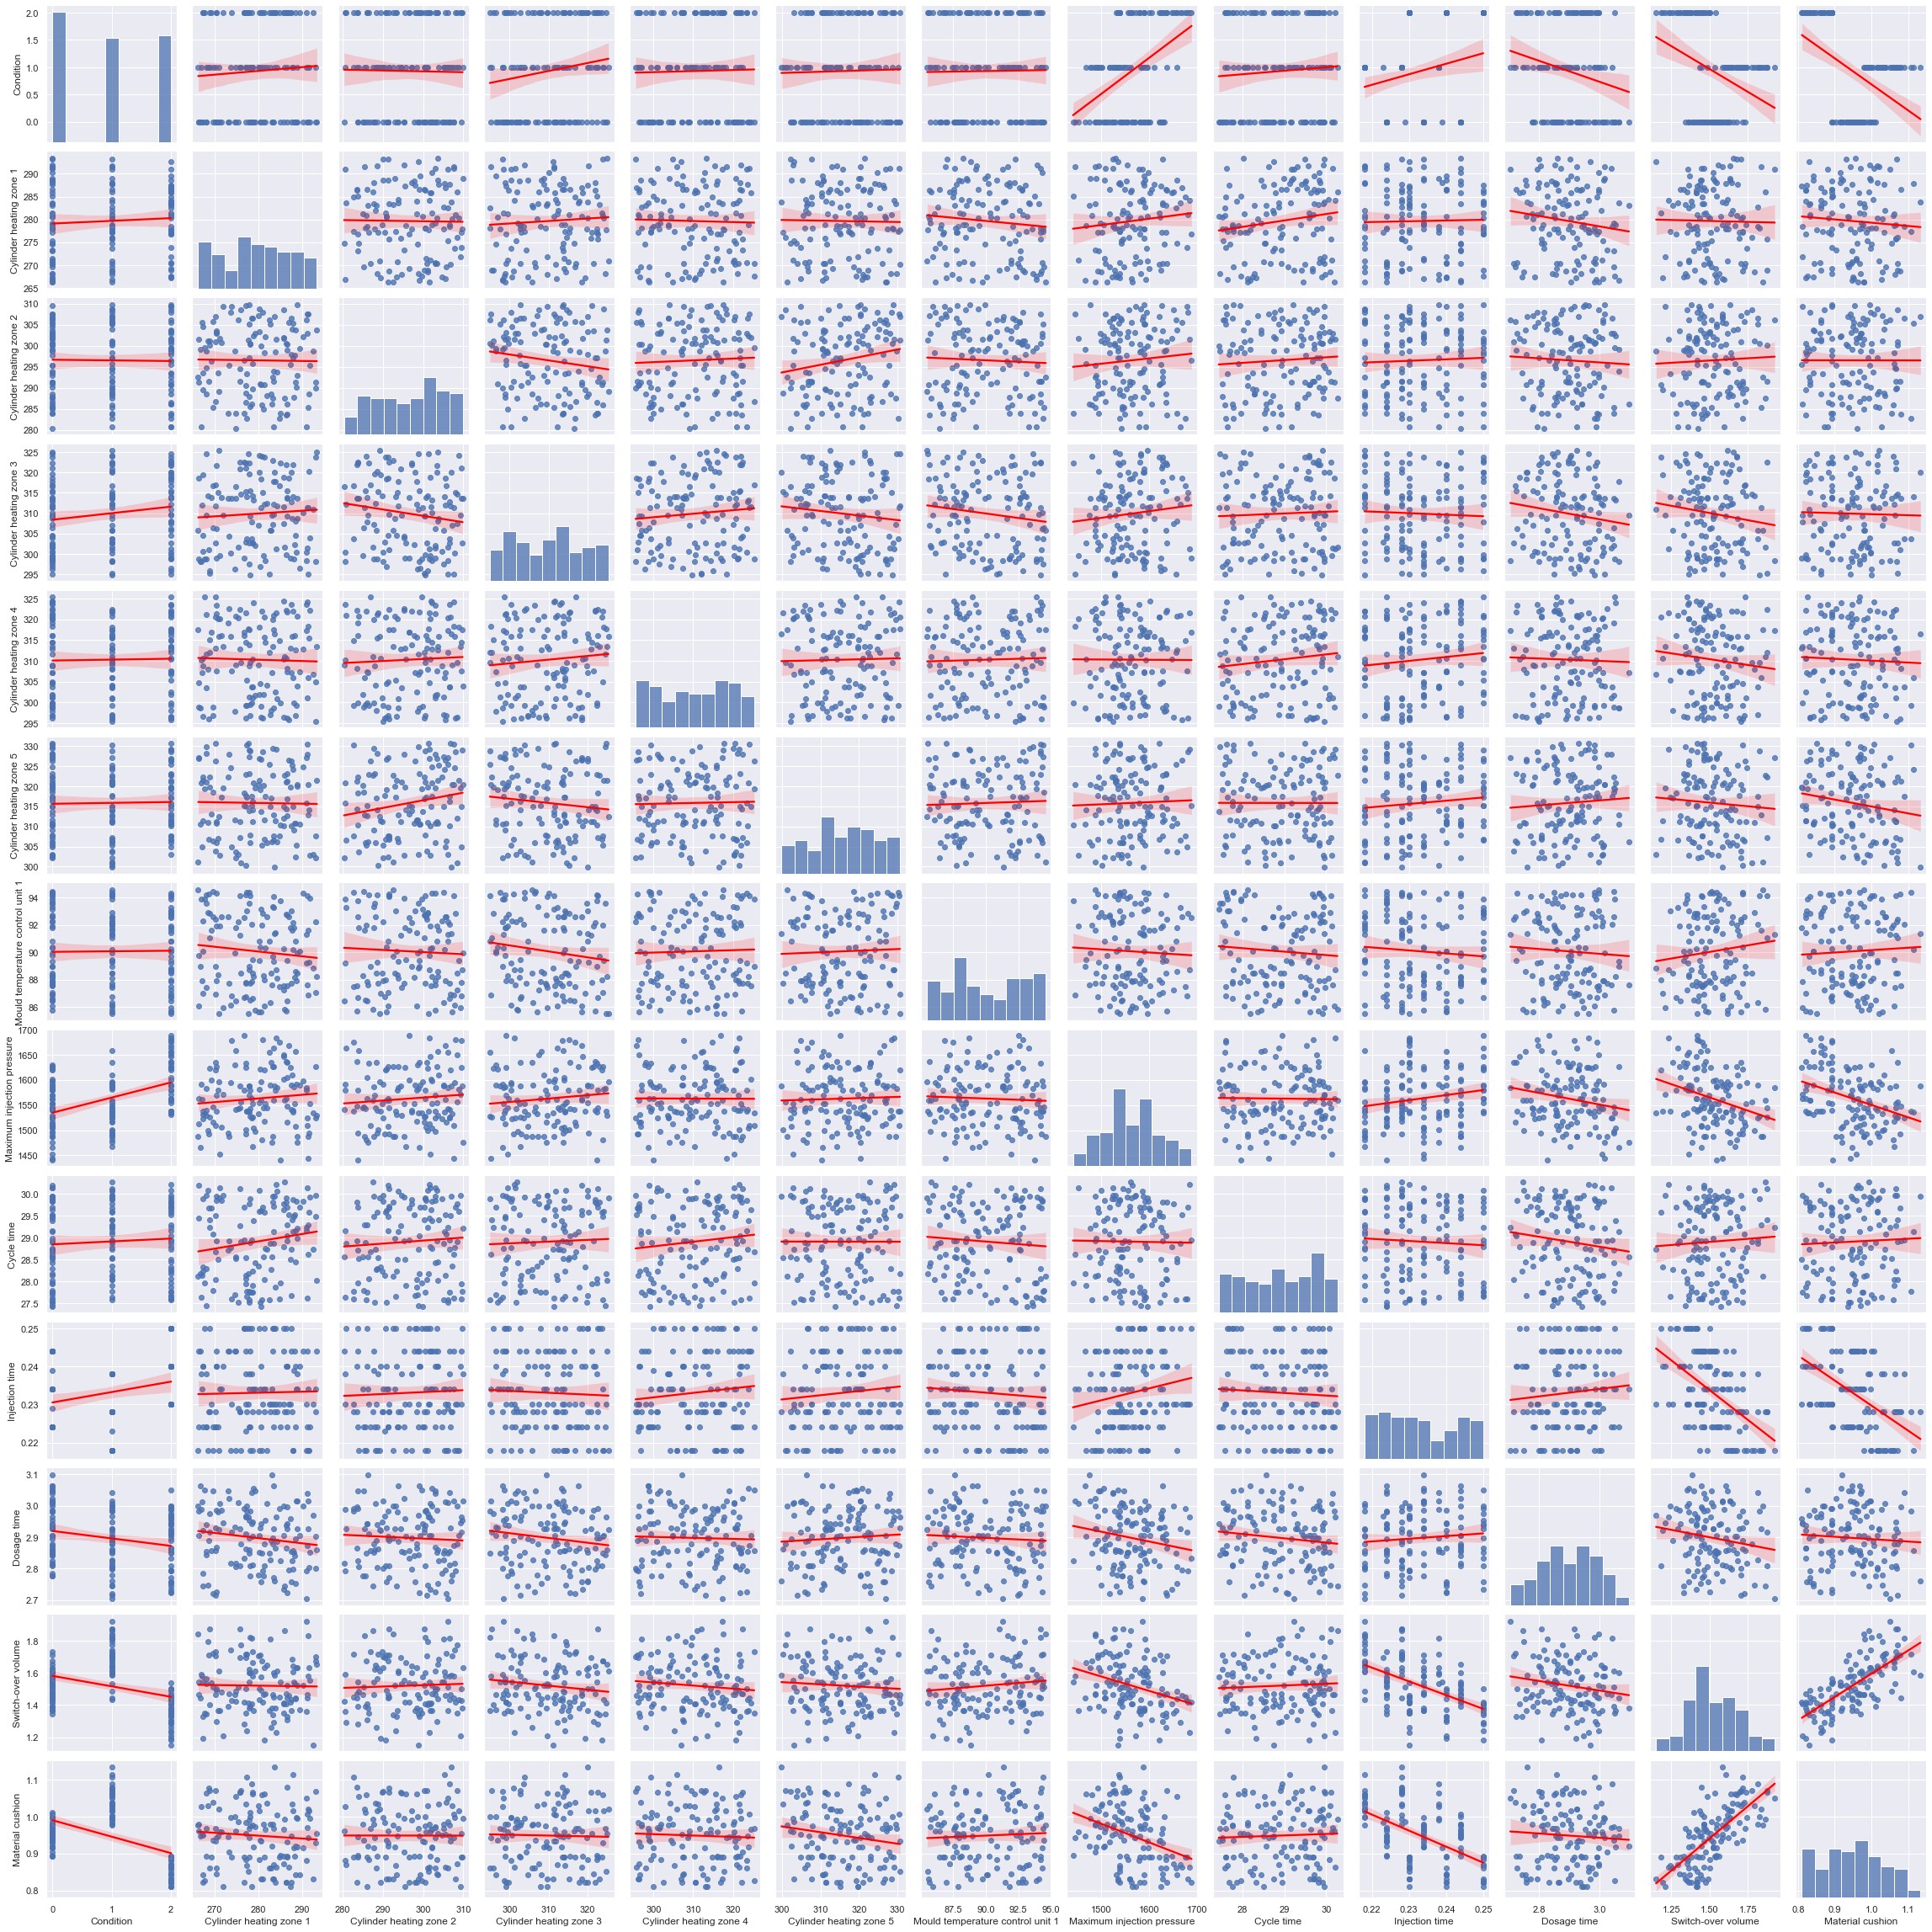

In [11]:
g = sns.pairplot(dataframenew1, kind="reg", plot_kws={'line_kws':{'color':'red'}}) #pairplot including conditions not just parameters with a trend line
plt.show()

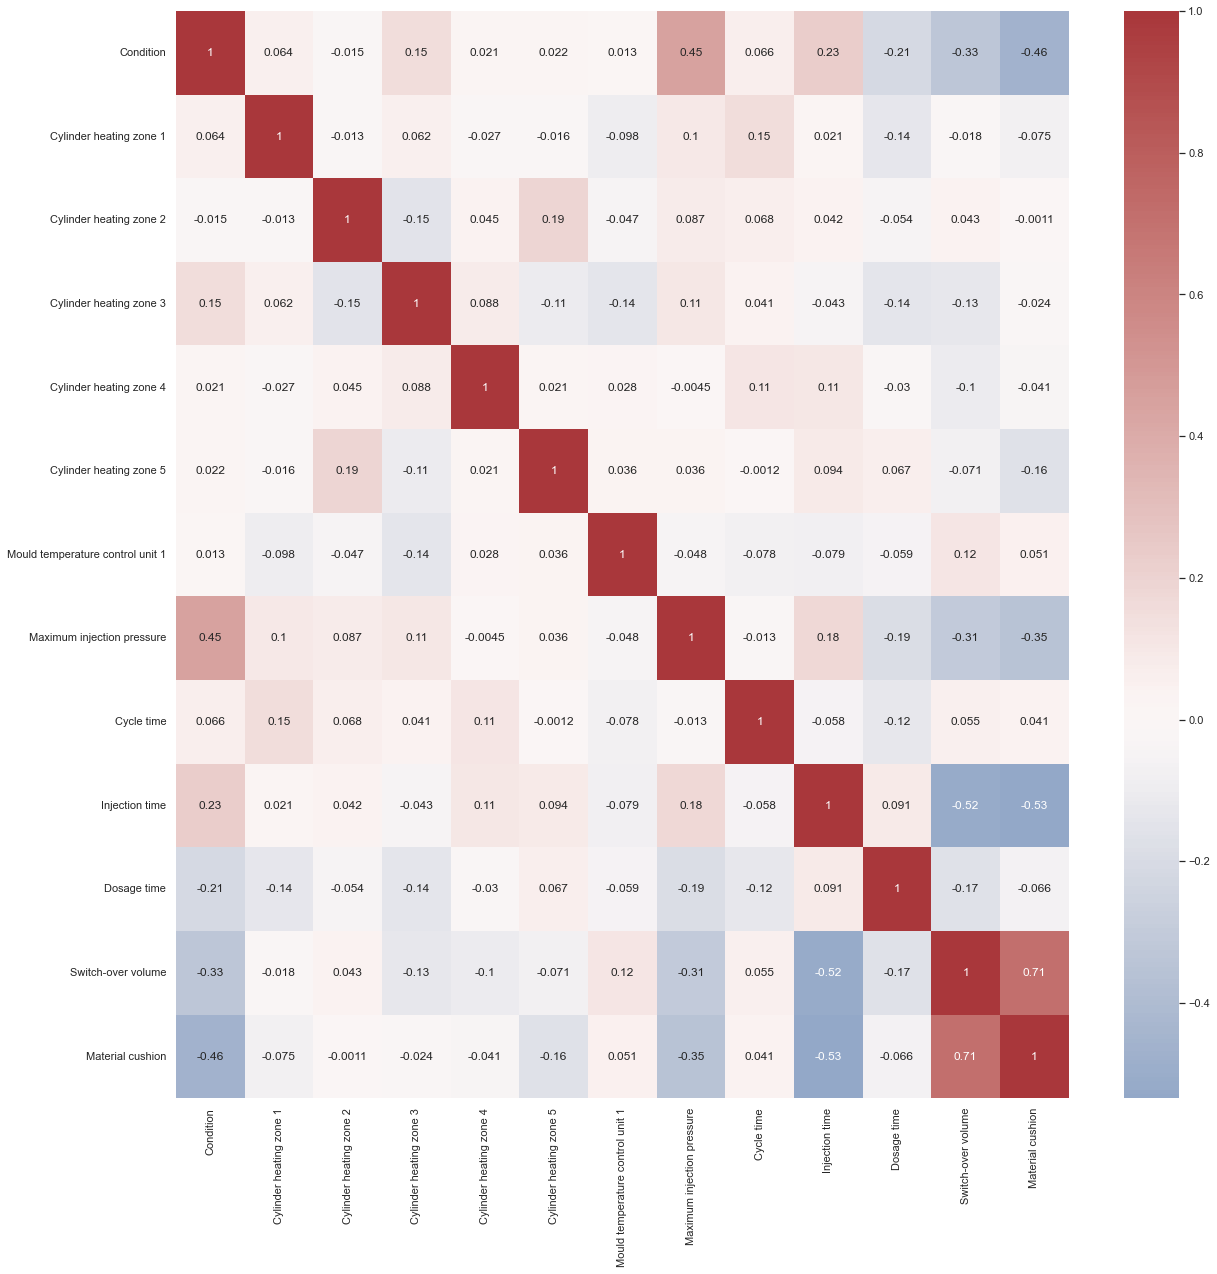

In [12]:
corrMatrix = dataframenew1.corr(method='pearson') #
sns.heatmap(corrMatrix, annot=True, cmap="vlag", center=0)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [13]:
# the pairplot doesnt correspond with the trend line, and hence we decided to reparameterise the conditions

In [14]:
# 2nd try in parameterisation
dataframenew2= raw.replace('Normal1',1).replace('Condition3',2).replace('Condition4',0) 
display(abs(dataframenew2.corr()['Condition']).sort_values(ascending = 0))

Condition                           1.000000
Material cushion                    0.919151
Switch-over volume                  0.793523
Injection time                      0.589711
Maximum injection pressure          0.438870
Cylinder heating zone 5             0.141992
Cycle time                          0.076008
Cylinder heating zone 1             0.071995
Mould temperature control unit 1    0.041027
Cylinder heating zone 3             0.040172
Dosage time                         0.039546
Cylinder heating zone 4             0.038310
Cylinder heating zone 2             0.017432
Name: Condition, dtype: float64

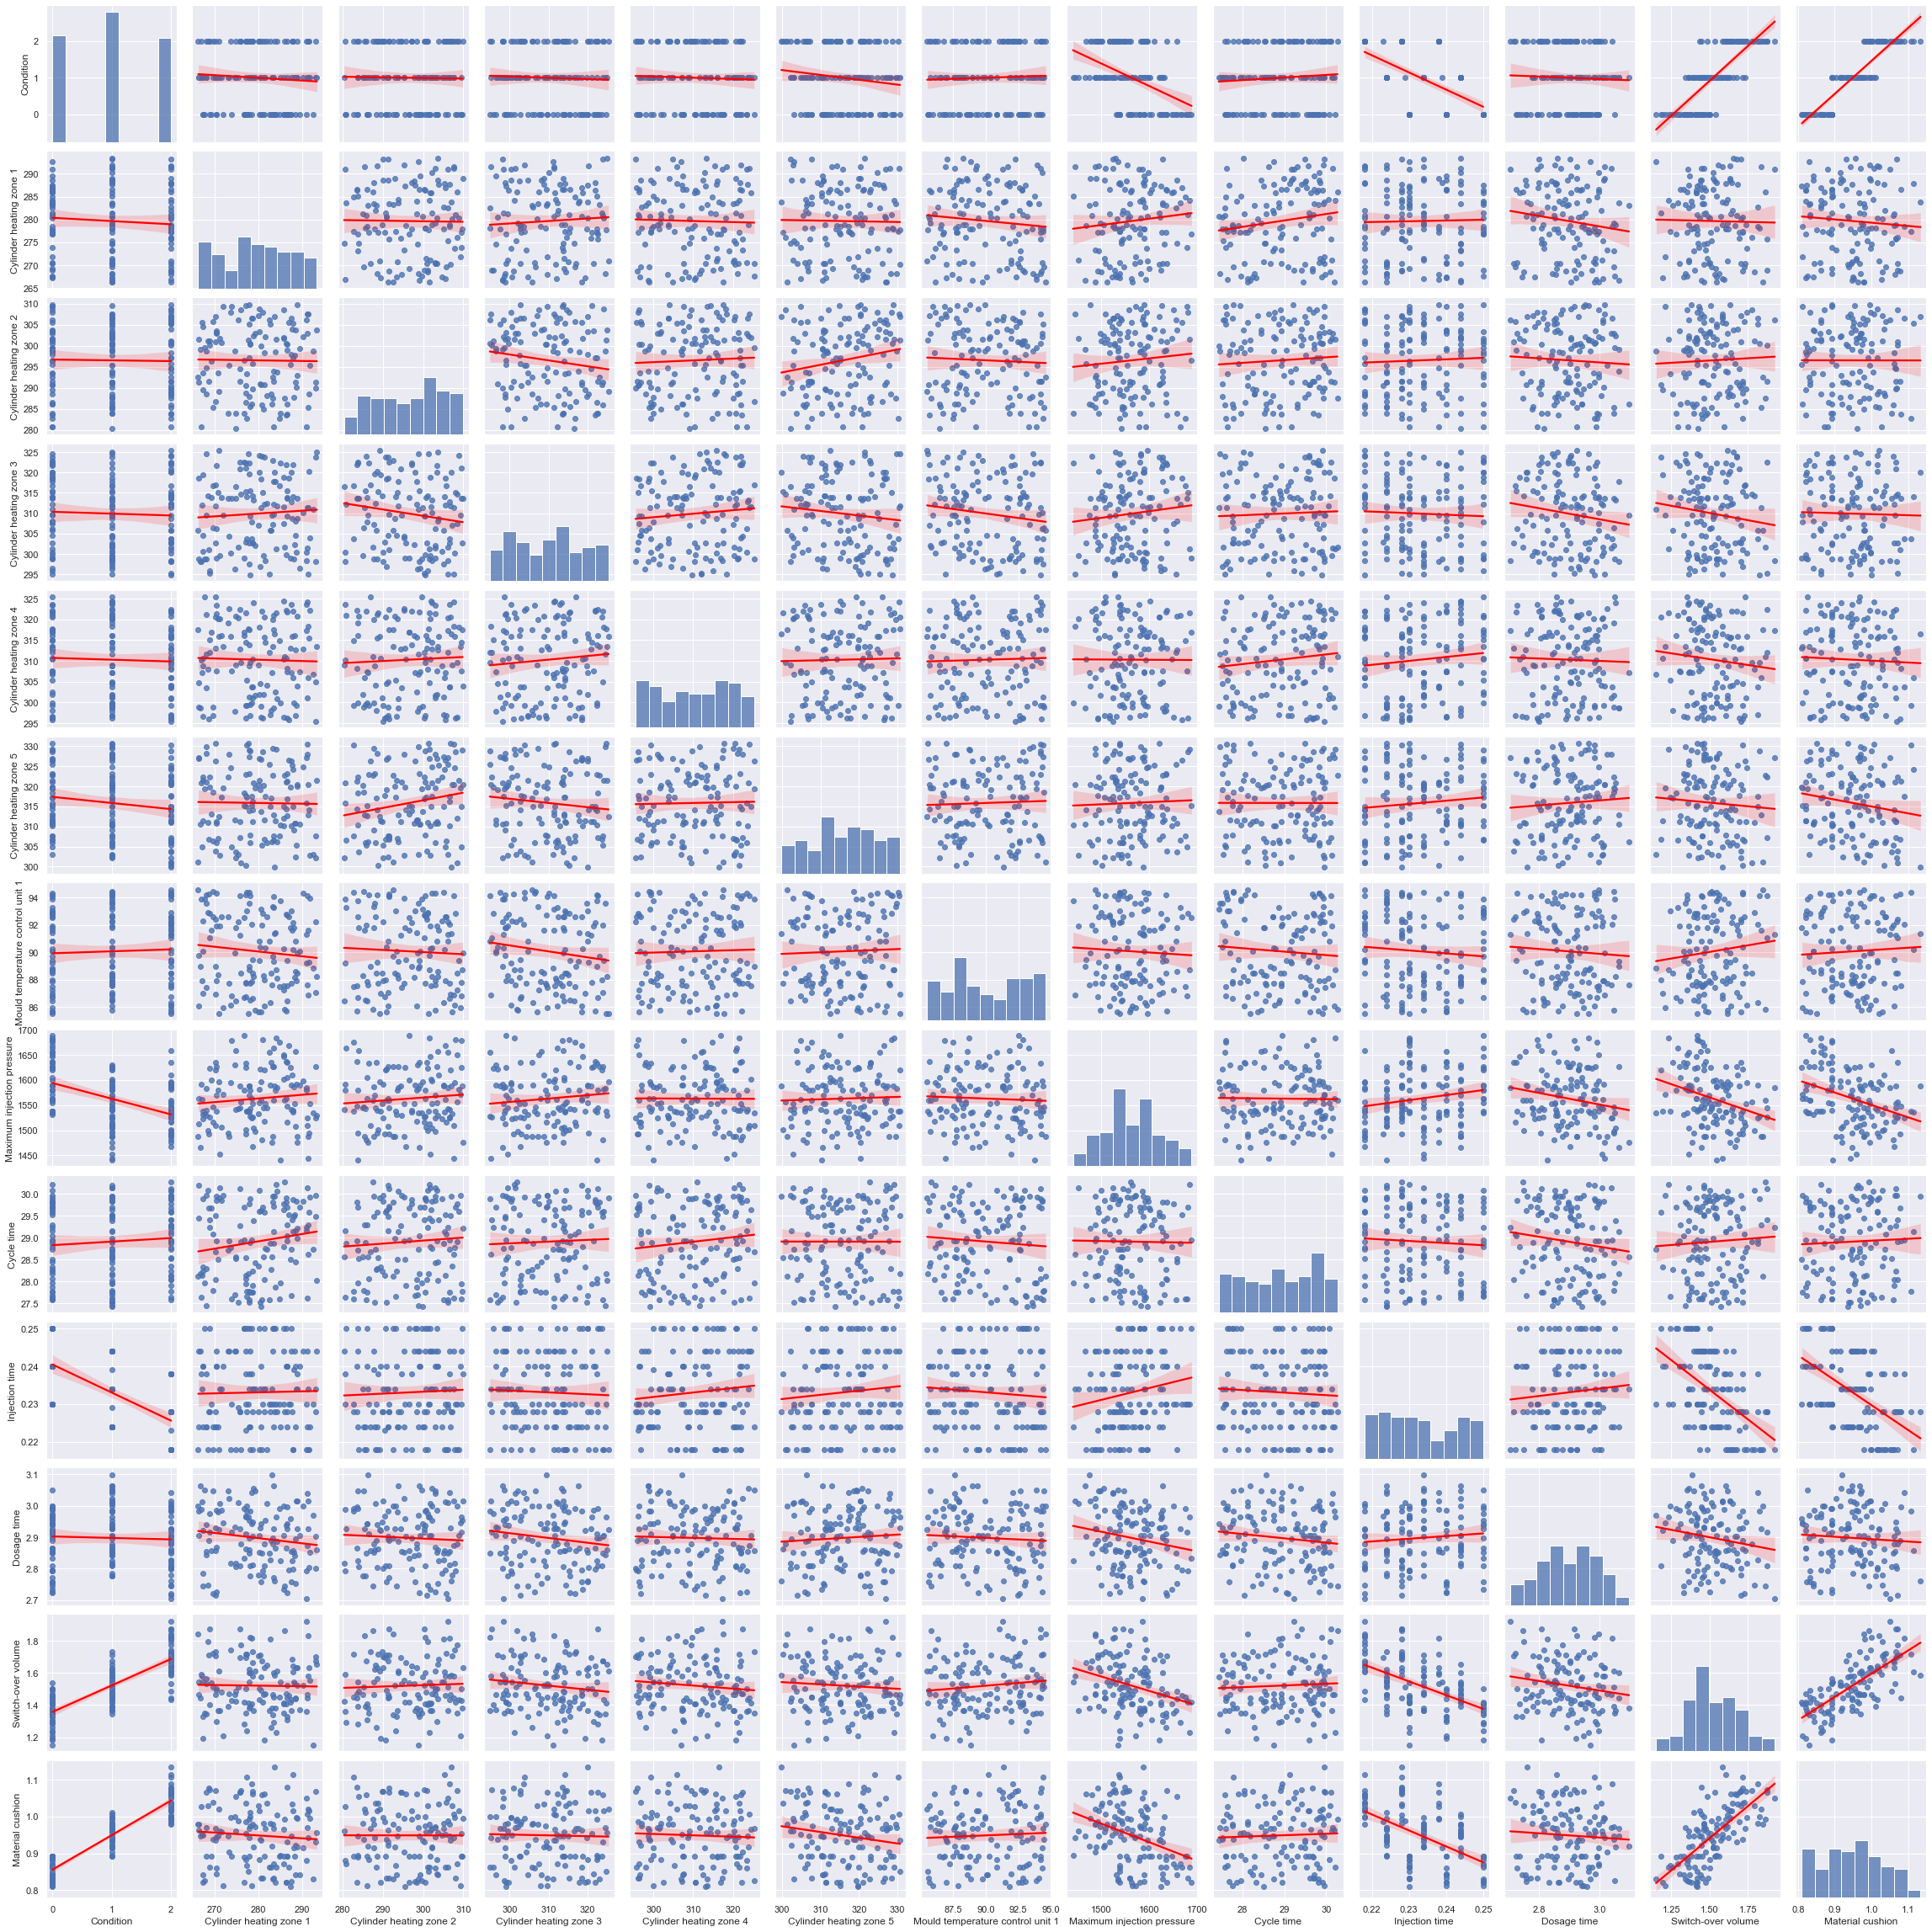

In [15]:
 #pairplot including conditions not just parameters with a trend line
g = sns.pairplot(dataframenew2, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

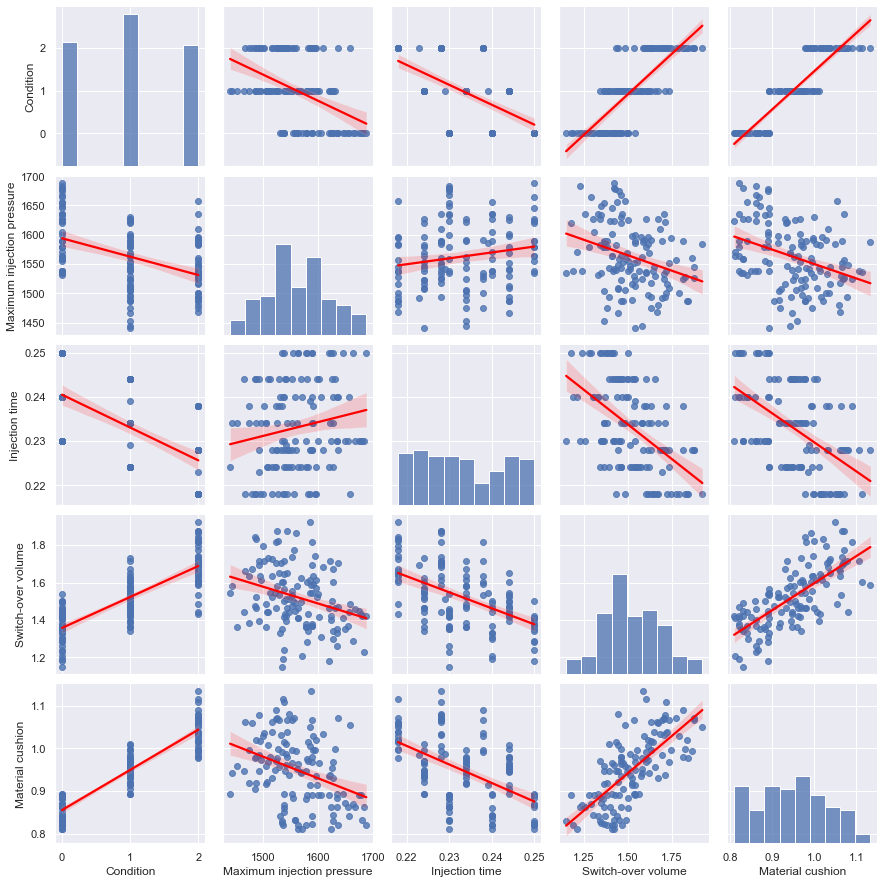

In [16]:
 #pairplot only considering relationship with condition and 4 key parameters
g = sns.pairplot(dataframenew2[["Condition","Maximum injection pressure","Injection time","Switch-over volume","Material cushion"]], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

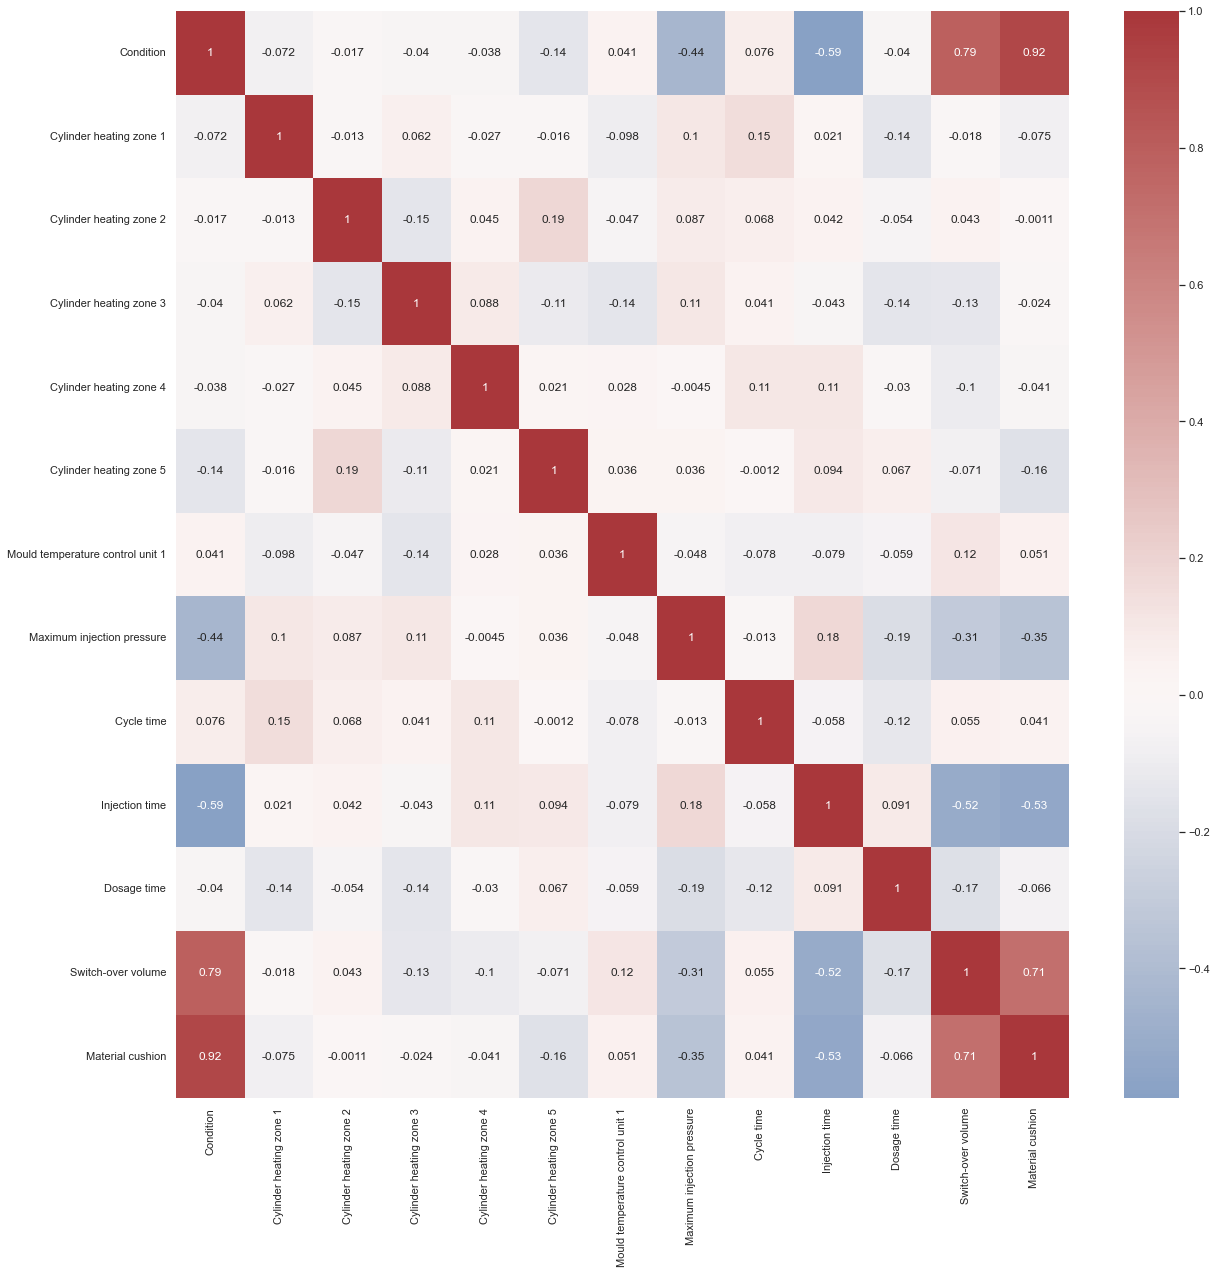

In [17]:
corrMatrix = dataframenew2.corr(method='pearson') #
sns.heatmap(corrMatrix, annot=True, cmap="vlag", center=0)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [18]:
# After which and upon successful matching, we filtered out the relevant parameters that we identified that has the most impact on conditions
# (maximum injection pressure, injection time, material cushion, switch-over volume)
# Hence we narrowed down other excessive parameters and focused on these 4 and how it affected the classes in condition

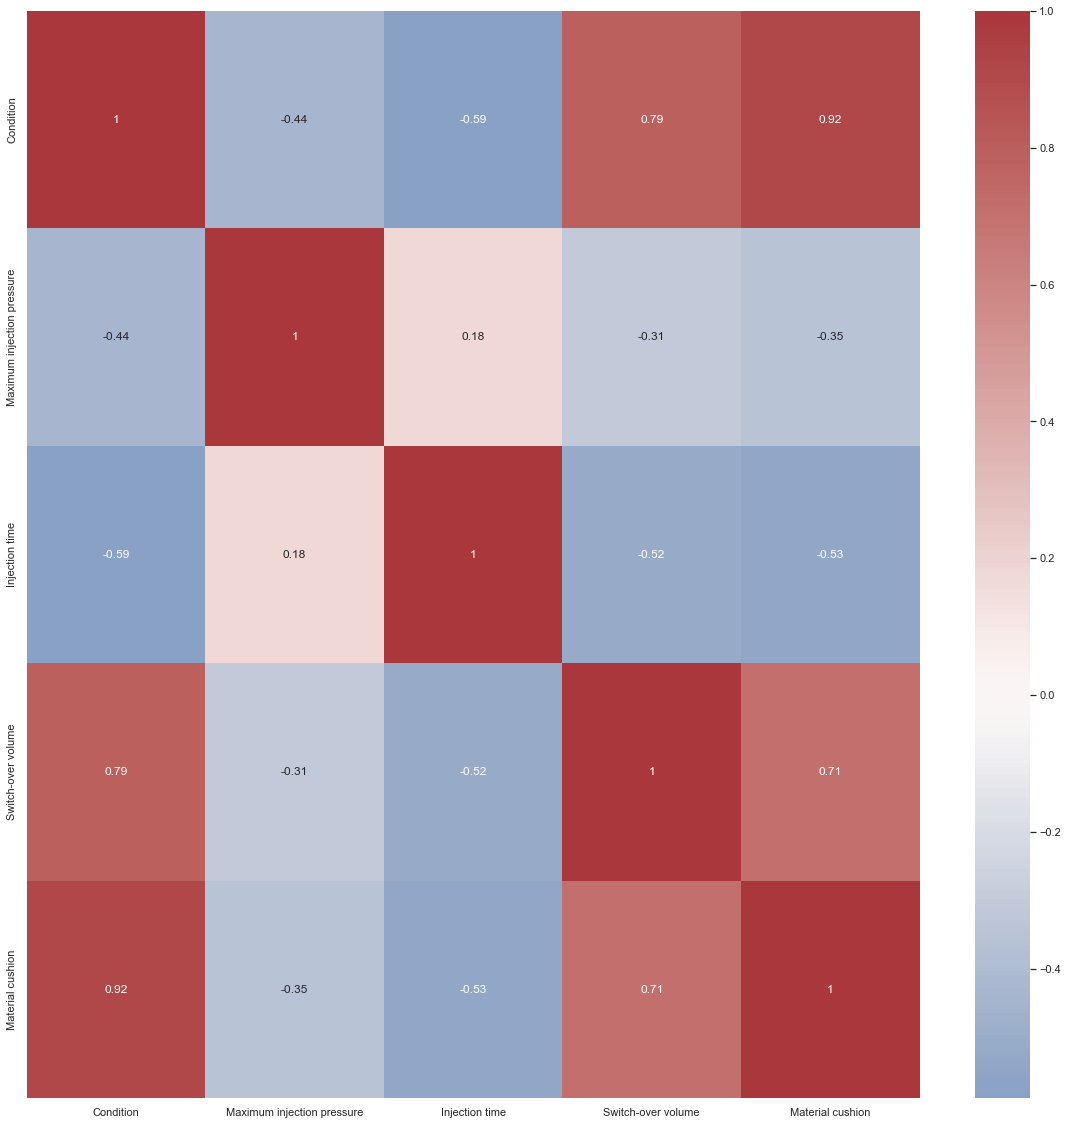

In [19]:
#narrowed down correaltion matrix for easier analysis
dataframenew3 = dataframenew2[["Condition","Maximum injection pressure","Injection time","Switch-over volume","Material cushion"]]
corrMatrix = dataframenew3.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True, cmap="vlag", center=0)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

Text(0.5, 1.0, 'Maximum injection pressure against 3 conditions')

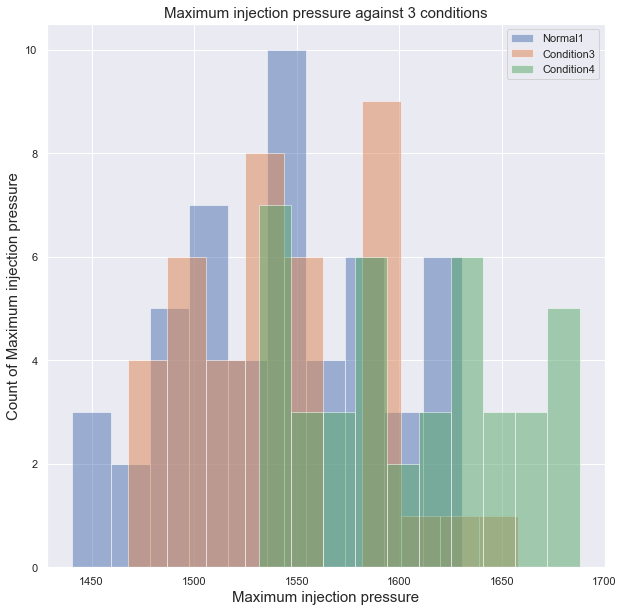

In [20]:
#plot maximum injection for all 3 conditions to get a better sensing of the spread between conditions

dffinal_maxinjectionpressure = raw.query("Condition== 'Normal1'")
plt.hist(dffinal_maxinjectionpressure['Maximum injection pressure'],alpha=0.5,label='Normal1')
dffinal_maxinjectionpressure = raw.query("Condition== 'Condition3'")
plt.hist(dffinal_maxinjectionpressure['Maximum injection pressure'],alpha=0.5,label='Condition3')
dffinal_maxinjectionpressure = raw.query("Condition== 'Condition4'")
plt.hist(dffinal_maxinjectionpressure['Maximum injection pressure'],alpha=0.5,label='Condition4')
plt.legend()
plt.xlabel("Maximum injection pressure",fontsize = 15)
plt.ylabel("Count of Maximum injection pressure",fontsize = 15)
plt.title("Maximum injection pressure against 3 conditions",fontsize = 15)



Text(0.5, 1.0, 'Switch-over volume against 3 conditions')

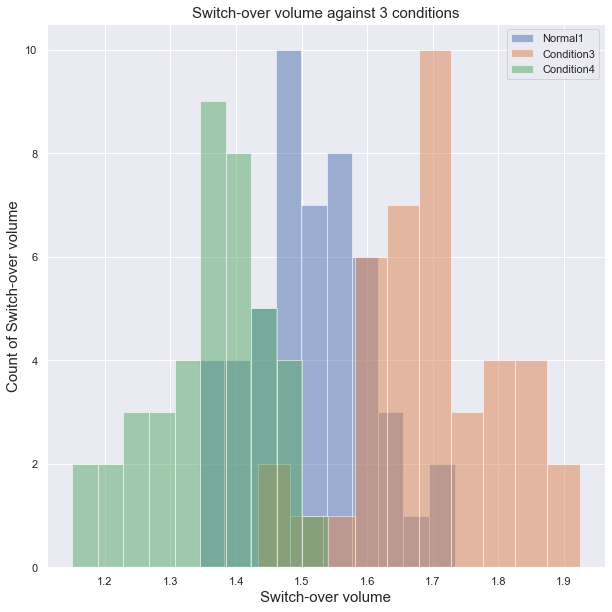

In [21]:
#plot switchover volume for all 3 conditions to get a better sensing of the spread between conditions
dffinal_switchovervolume = raw.query("Condition== 'Normal1'")
plt.hist(dffinal_switchovervolume['Switch-over volume'],alpha=0.5,label='Normal1')
dffinal_switchovervolume = raw.query("Condition== 'Condition3'")
plt.hist(dffinal_switchovervolume['Switch-over volume'],alpha=0.5,label='Condition3')
dffinal_switchovervolume = raw.query("Condition== 'Condition4'")
plt.hist(dffinal_switchovervolume['Switch-over volume'],alpha=0.5,label='Condition4')
plt.legend()
plt.xlabel("Switch-over volume",fontsize = 15)
plt.ylabel("Count of Switch-over volume",fontsize = 15)
plt.title("Switch-over volume against 3 conditions",fontsize = 15)



Text(0.5, 1.0, 'Material Cushion against 3 conditions')

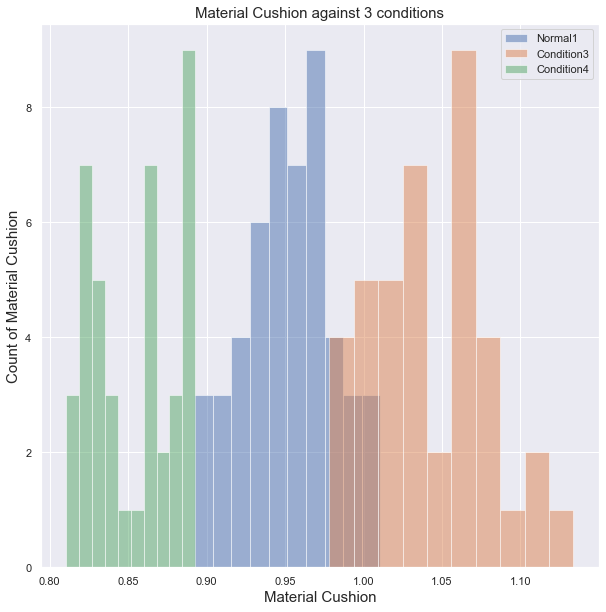

In [22]:
#plot material cushion for all 3 conditions to get a better sensing of the spread between conditions

dffinal_materialcushion = raw.query("Condition== 'Normal1'")
plt.hist(dffinal_materialcushion['Material cushion'],alpha=0.5,label='Normal1')
dffinal_materialcushion = raw.query("Condition== 'Condition3'")
plt.hist(dffinal_materialcushion['Material cushion'],alpha=0.5,label='Condition3')
dffinal_materialcushion = raw.query("Condition== 'Condition4'")
plt.hist(dffinal_materialcushion['Material cushion'],alpha=0.5,label='Condition4')
plt.legend()
plt.xlabel("Material Cushion",fontsize = 15)
plt.ylabel("Count of Material Cushion",fontsize = 15)
plt.title("Material Cushion against 3 conditions",fontsize = 15)

Text(0.5, 1.0, 'Injection time against 3 conditions')

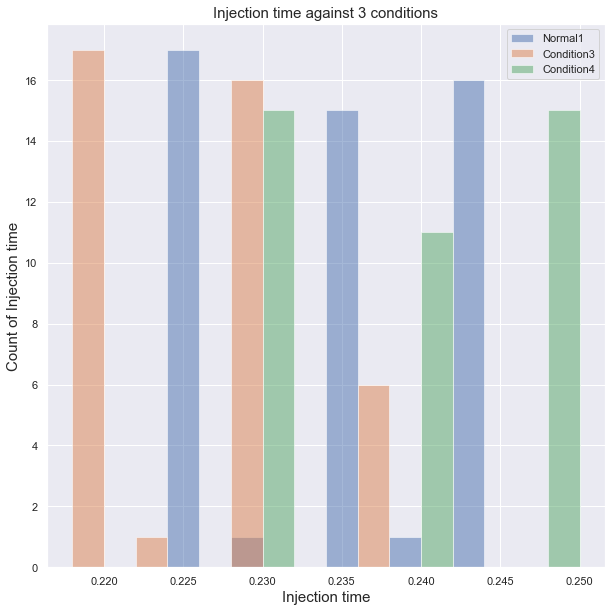

In [23]:
#plot injection time for all 3 conditions to get a better sensing of the spread between conditions
dffinal_injectiontime = raw.query("Condition== 'Normal1'")
plt.hist(dffinal_injectiontime['Injection time'],alpha=0.5,label='Normal1')
dffinal_injectiontime = raw.query("Condition== 'Condition3'")
plt.hist(dffinal_injectiontime['Injection time'],alpha=0.5,label='Condition3')
dffinal_injectiontime = raw.query("Condition== 'Condition4'")
plt.hist(dffinal_injectiontime['Injection time'],alpha=0.5,label='Condition4')
plt.legend()
plt.xlabel("Injection time",fontsize = 15)
plt.ylabel("Count of Injection time",fontsize = 15)
plt.title("Injection time against 3 conditions",fontsize = 15)



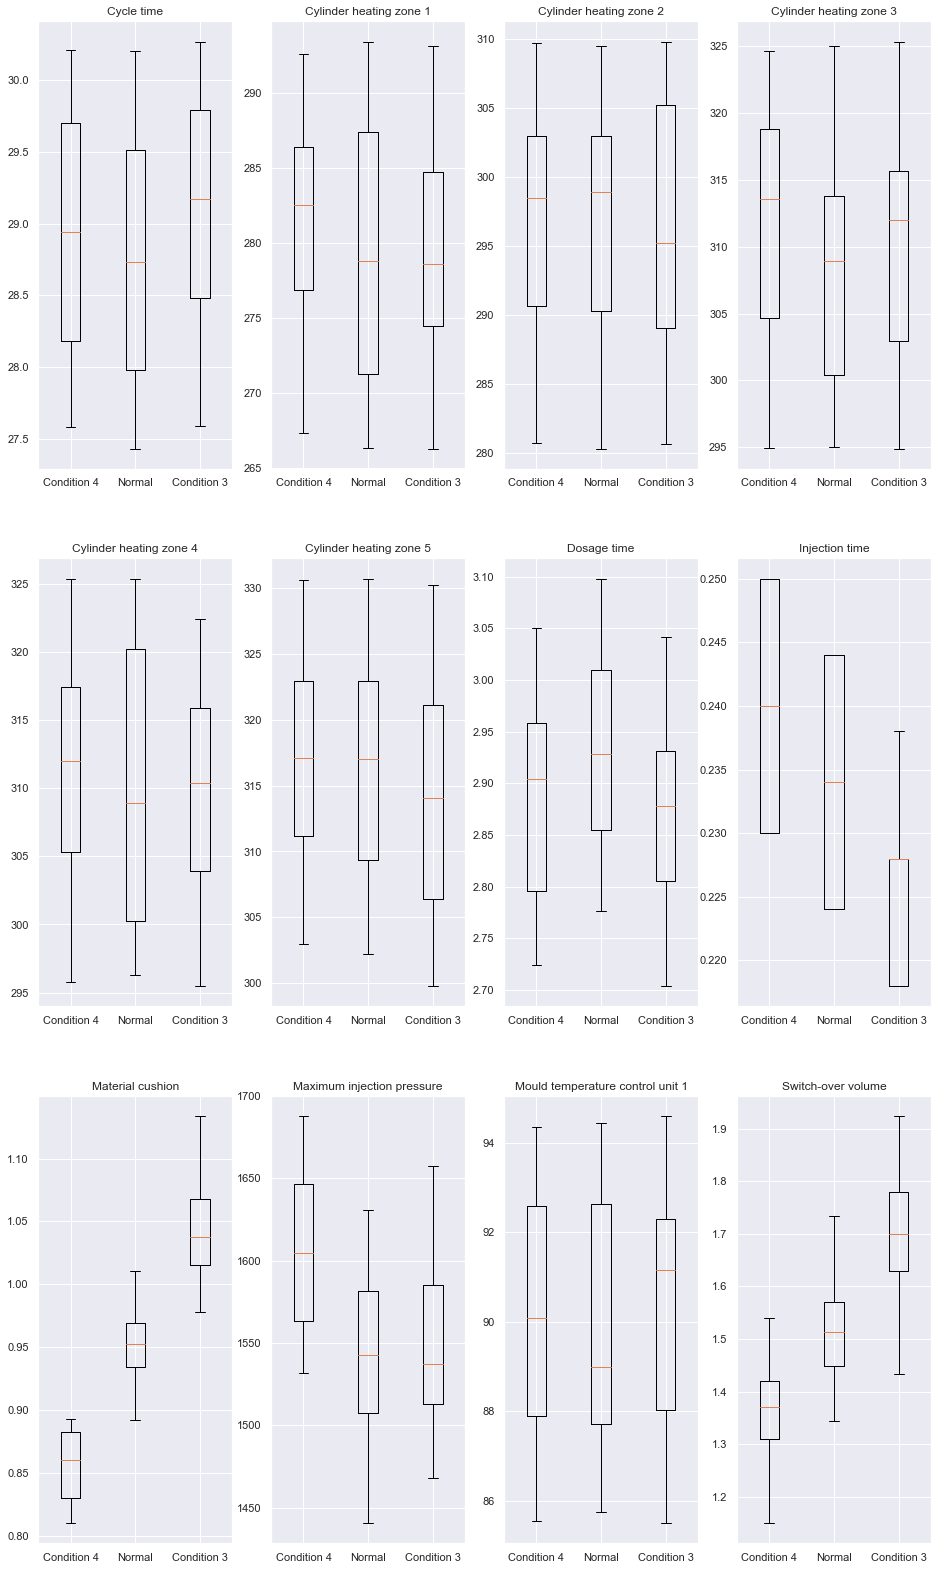

In [24]:
#box plot for in depth analysis
fig,axarr = plt.subplots(3,4,figsize = (16,28)) 

for row in range(3):
    for col in range(4):
        C4_data = C4filled[C4filled.columns.sort_values()[1+4*row+col]]
        N_data = Nfilled[Nfilled.columns.sort_values()[1+4*row+col]]
        C3_data = C3filled[C3filled.columns.sort_values()[1+4*row+col]]
        
        axarr[row,col].boxplot([C4_data,N_data,C3_data],labels = ['Condition 4','Normal','Condition 3'])
        axarr[row,col].title.set_text(raw.columns.sort_values()[1+4*row+col])